In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import healconv as hc
%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport healconv


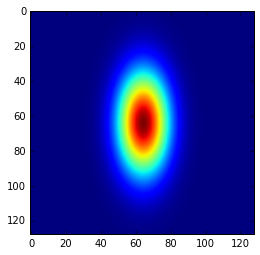

In [26]:
Ns=128
## clearly, beam must be centered around zero!
#np.outer(np.ones(Ns),np.hstack((arange(0,Ns/2),arange(-Ns/2,0))))
x=np.outer(np.ones(Ns),arange(-Ns/2,Ns/2))
y=x.T
beam=(exp(-x**2/(2*10**2)-y**2/(2*20**2)))
beam/=beam.sum()
plt.imshow(beam)

In [3]:
Nside=64
Npix=Nside**2*12

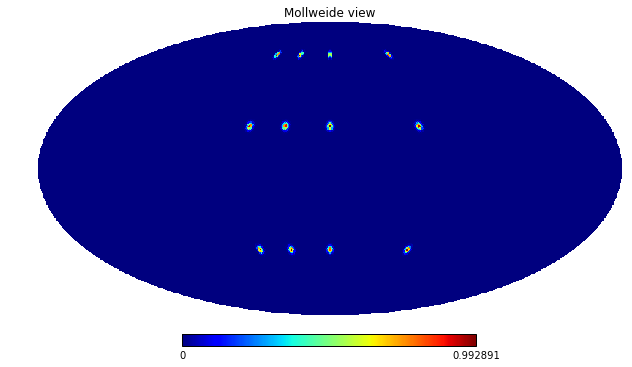

In [43]:
# let's generate some map
tmp=np.zeros(Npix)
theta,phi=hp.pix2ang(Nside,range(Npix))
phi[phi>np.pi]-=2*np.pi
#tmp+=4
#tmp=sin(theta)*(sin(theta**3+phi**2))
for thetac in [0.5,1.2,2.3]:
    for phic in [-1,0,0.5, 0.9]:
        tmp+=exp(-(theta-thetac)**2/(2*0.02**2)-(phi-phic)**2/(2*0.02**2))
hp.mollview(tmp)

76 5776


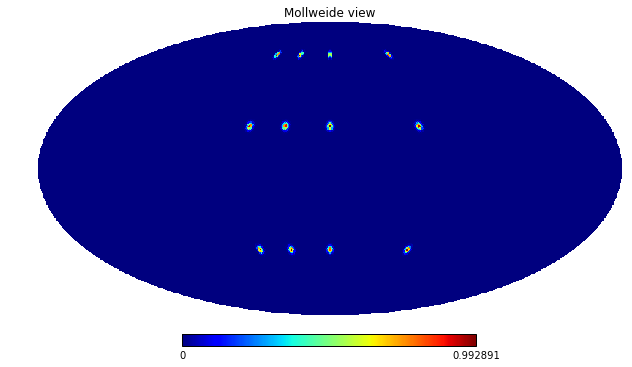

In [44]:
## debug == 1 here just just deprojects back
otmp=hc.healconvolve(tmp,beam,0.005,debug=1)
hp.mollview(otmp)

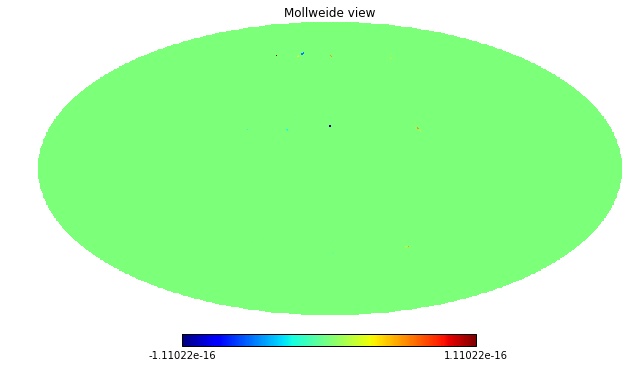

In [45]:
hp.mollview((otmp-tmp))

In [50]:
## now do the convolution
otmp=hc.healconvolve(tmp,beam,0.005,2,1.7)
otmp2=hc.healconvolve(tmp,beam,0.005,4,1.5)

173 29929
76 5776


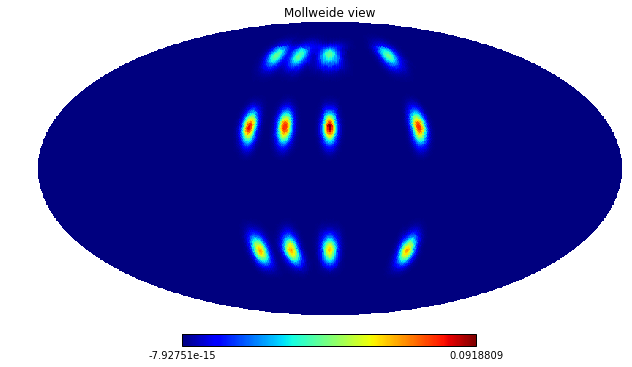

In [49]:
hp.mollview(otmp)

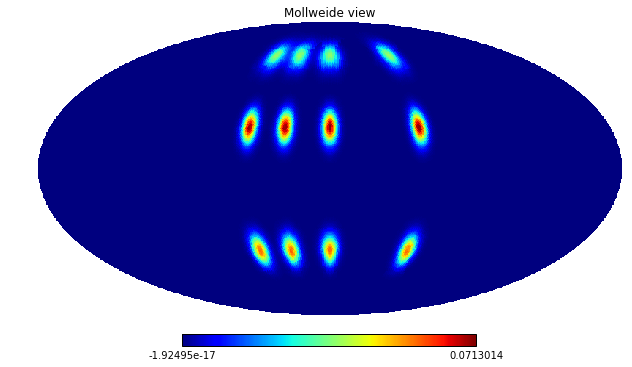

In [51]:
hp.mollview(otmp2)

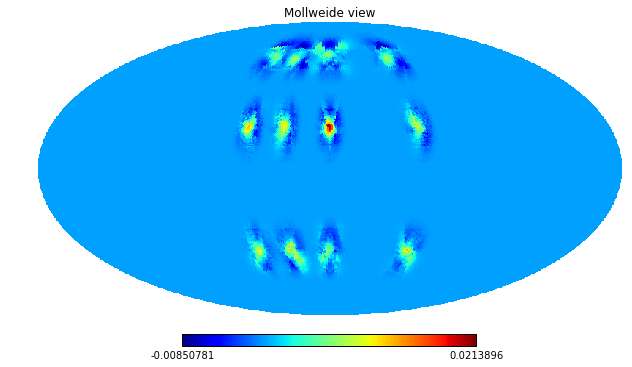

In [52]:
hp.mollview(otmp-otmp2)